## linpolhw
13.8.25

imports:

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

evaluation logic:

In [136]:
def adjusted_r2(r2, n, p):
    mone = (1 - r2) * (n - 1)
    mehane = (n - p - 1)
    return 1 - (mone / mehane)

def print_evaluation(y_calc, true_y, msg, is_poly = True):
    mse_linear = mean_squared_error(true_y, y_calc)
    mae_linear = mean_absolute_error(true_y, y_calc)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(true_y, y_calc)
    print(f"{msg} MSE       : {mse_linear:.6f}")
    print(f"{msg} MAE       : {mae_linear:.6f}")
    print(f"{msg} RMSE      : {rmse_linear:.6f}")
    print(f"{msg} R^2       : {r2_linear:.6f}")

    if is_poly:
        adj_r2 = adjusted_r2(r2_linear, n=len(y_train), p=X.shape[1])
        print(f"{msg} ADJ R^2   : {adj_r2:.6f}")

first dataset:

Slope (m): 2.00
Intercept (b): 3.06
dataset MSE       : 0.018024
dataset MAE       : 0.116000
dataset RMSE      : 0.134254
dataset R^2       : 0.999456


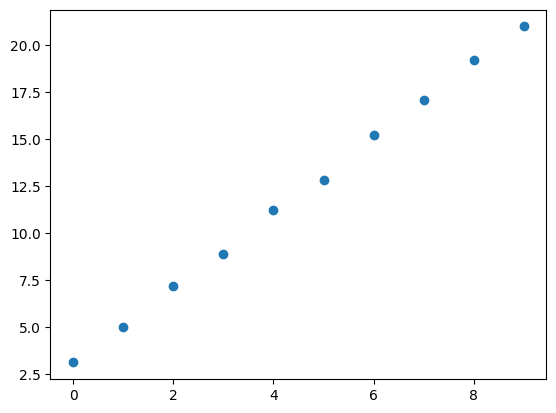

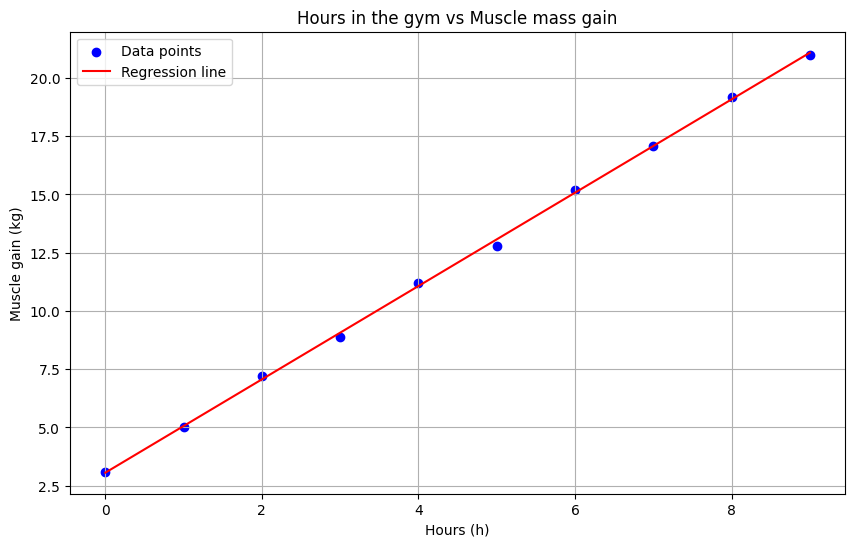

In [139]:
# Data from the table
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([3.1, 5.0, 7.2, 8.9, 11.2, 12.8, 15.2, 17.1, 19.2, 21.0])

plt.scatter(X, y) # Result looks linear

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Print model details
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (b): {model.intercept_:.2f}")

# Print evaluation, false for linear regression
print_evaluation(model.predict(X), y, 'dataset', False)

# Display the linear regression model we created above
x_curve = np.linspace(0, 9, 20).reshape(-1, 1)
y_curve = model.predict(x_curve)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(x_curve, model.predict(x_curve), color='red', label='Regression line')
plt.title('Hours in the gym vs Muscle mass gain')
plt.xlabel('Hours (h)')
plt.ylabel('Muscle gain (kg)')
plt.grid(True)
plt.legend()
plt.show()

second dataset

train MSE       : 0.616997
train MAE       : 0.593072
train RMSE      : 0.785492
train R^2       : 0.987245
train ADJ R^2   : 0.985119

test MSE       : 6.092217
test MAE       : 2.203128
test RMSE      : 2.468242
test R^2       : 0.945138
test ADJ R^2   : 0.935995


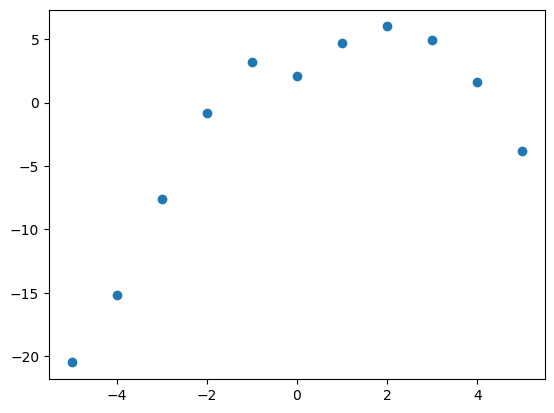

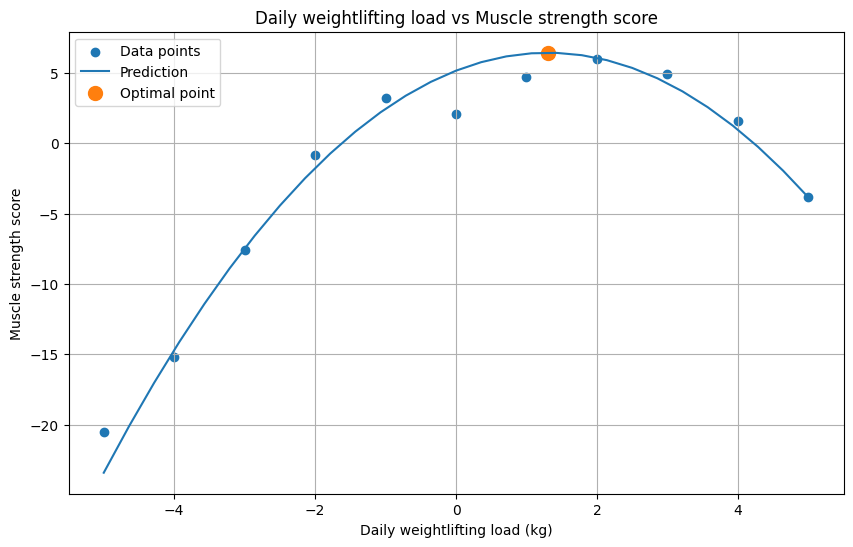

In [142]:
# Data from the table
X = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([-20.5, -15.2, -7.6, -0.8, 3.2, 2.1, 4.7, 6.0, 4.9, 1.6, -3.8])

plt.scatter(X, y) # Result looks polynomial

# Create a model
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Seperate data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and make the prediction for train and test
polynomial_model.fit(X_train, y_train)
y_pred_linear_train = polynomial_model.predict(X_train)
y_pred_linear_test = polynomial_model.predict(X_test)

# Print evaluation
print_evaluation(y_pred_linear_train, y_train, 'train')
print()
print_evaluation(y_pred_linear_test, y_test, 'test')

# Coefficients
coefficients = polynomial_model.named_steps['linear'].coef_
intercept = polynomial_model.named_steps['linear'].intercept_

# Optimal point (vertex of the parabola)
optimal_point = -coefficients[1] / (2 * coefficients[2])
predicted_optimal_y = polynomial_model.predict([[optimal_point]])[0]

# Create smooth curve for plotting
x_curve = np.linspace(-5, 5, 29).reshape(-1, 1)
y_curve = polynomial_model.predict(x_curve)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')
plt.plot(x_curve, y_curve, label='Prediction')
plt.scatter([[optimal_point]], [[predicted_optimal_y]], s=100, label='Optimal point')
plt.title('Daily weightlifting load vs Muscle strength score')
plt.xlabel('Daily weightlifting load (kg)')
plt.ylabel('Muscle strength score')
plt.grid(True)
plt.legend()
plt.show()